In [1]:

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.image as mp

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
with open('/content/drive/My Drive/Main/train.mn.txt') as file:
    mal_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/train.en.txt') as file:
    eng_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/train_images.txt') as file:
    train_images = file.read().split('\n')


In [4]:
train_images[-1]

''

In [5]:
#removing last elements which containing special characters
mal_txt.pop()
mal_txt.pop()
eng_txt.pop()
eng_txt.pop()
train_images.pop()
print(len(mal_txt))
print(len(eng_txt))
print(len(train_images))
img_path=[]
for s in train_images:
    img_path.append("/content/drive/My Drive/Main/trainimages/train/"+s)

28930
28931
28931


In [6]:
print(mal_txt[1])
print(eng_txt[1])

ഇത് ഒരു ഇൻഡോർ രംഗമാണ്
it is an indoor scene						


In [ ]:
mal_txt[0:15]

['ശാന്തമായ  കടലിൽ സർഫിങ് നടത്തുന്ന പുരുഷ സർഫർ',
 'ഇത് ഒരു ഇൻഡോർ രംഗമാണ്',
 'കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി',
 'മനുഷ്യന് ചെറിയ മുടിയുണ്ട്',
 'ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു',
 'കറുത്ത കാറിനടുത്ത് ഒരു കൂട്ടം പെൺകുട്ടികളുണ്ട്',
 'ഒരു ഉന്തുവണ്ടിയിലെ കുട്ടി',
 'ഉയരമുള്ള മെറ്റൽ ലൈറ്റ്പോസ്റ്റ്',
 'മതിൽ വെളുത്ത ചായം പൂശി',
 'ചാരനിറത്തിലുള്ള റോഡിന്റെ വശങ്ങളിൽ പച്ച പുല്ലിന്റെ സ്ട്രിപ്പുകൾ',
 'സമുദ്രം അഭിമുഖീകരിക്കുന്ന സ്ത്രീ',
 'ഇതൊരു ഓഫീസ് രേഖാചിത്രം',
 'നാല് ലോഹത്തിന്റെ കസേരകൾ',
 'കോലാഹലം ഒരു മേശപ്പുറത്താണ്',
 'ഒരു വെളുത്ത മൈക്രോവേവ് ഓവൻ']

In [ ]:
eng_txt[0:15]

['Male surfer surfing in still in the ocean',
 'it is an indoor scene\t\t\t\t\t\t',
 'Computer screens turned on\t\t\t\t\t\t',
 'man has short hair\t\t\t\t\t\t',
 "photo album open on an adult's lap\t\t\t\t\t\t",
 'there is a group of girls beside the black car\t\t\t\t\t\t',
 'Child in a stroller\t\t\t\t\t\t',
 'Tall metal lightpost\t\t\t\t\t\t',
 'wall is painted white\t\t\t\t\t\t',
 'there are several pictures on the wall\t\t\t\t\t\t',
 'woman facing the ocean\t\t\t\t\t\t',
 'this is an office layout\t\t\t\t\t\t',
 'four metallic chairs\t\t\t\t\t\t',
 'Clutter is on a table\t\t\t\t\t\t',
 'a white microwave oven\t\t\t\t\t\t']

/content/drive/My Drive/Main/trainimages/train/11.jpg
mal:ഇത് ഒരു ഇൻഡോർ രംഗമാണ്
eng:it is an indoor scene						


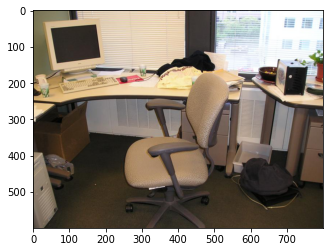

In [ ]:
im=mp.imread(img_path[1])
plt.imshow(im)
print(img_path[1])
print("mal:"+mal_txt[1])
print("eng:"+eng_txt[1])

/content/drive/My Drive/Main/trainimages/train/10.jpg
mal:ശാന്തമായ  കടലിൽ സർഫിങ് നടത്തുന്ന പുരുഷ സർഫർ
eng:Male surfer surfing in still in the ocean


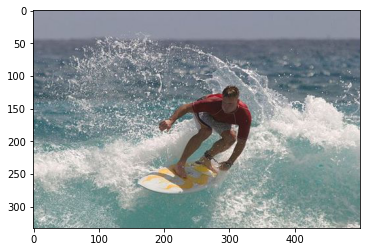

In [ ]:
im=mp.imread(img_path[0])
plt.imshow(im)
print(img_path[0])
print("mal:"+mal_txt[0])
print("eng:"+eng_txt[0])

In [7]:
#Manually splitting data for training and texting-due to presence of 3 inputs split using Sklearn  is not efficeint
splits=10001
mal_train=mal_txt[:splits]
eng_train=eng_txt[:splits]

In [8]:
mal_df = pd.DataFrame(mal_train, columns=['Malayalam']) 
eng_df = pd.DataFrame(eng_train, columns=['English']) 


In [ ]:
mal_df.head(10)

,Malayalam
0,ശാന്തമായ കടലിൽ സർഫിങ് നടത്തുന്ന പുരുഷ സർഫർ
1,ഇത് ഒരു ഇൻഡോർ രംഗമാണ്
2,കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി
3,മനുഷ്യന് ചെറിയ മുടിയുണ്ട്
4,ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു
5,കറുത്ത കാറിനടുത്ത് ഒരു കൂട്ടം പെൺകുട്ടികളുണ്ട്
6,ഒരു ഉന്തുവണ്ടിയിലെ കുട്ടി
7,ഉയരമുള്ള മെറ്റൽ ലൈറ്റ്പോസ്റ്റ്
8,മതിൽ വെളുത്ത ചായം പൂശി
9,ചാരനിറത്തിലുള്ള റോഡിന്റെ വശങ്ങളിൽ പച്ച പുല്ലിന...


In [ ]:
eng_df.head(10)

,English
0,Male surfer surfing in still in the ocean
1,it is an indoor scene\t\t\t\t\t\t
2,Computer screens turned on\t\t\t\t\t\t
3,man has short hair\t\t\t\t\t\t
4,photo album open on an adult's lap\t\t\t\t\t\t
5,there is a group of girls beside the black car...
6,Child in a stroller\t\t\t\t\t\t
7,Tall metal lightpost\t\t\t\t\t\t
8,wall is painted white\t\t\t\t\t\t
9,there are several pictures on the wall\t\t\t\t...


In [9]:
#Datacleaning by removing special characters
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r" ᠃", "", text)
    text = re.sub(r" ᠂", "", text)
    text = re.sub(r"-", " ", text)
    text = re.sub(r"<5>", "5", text)
    text = re.sub(r"“ ", "", text)
    text = re.sub(r" ”", "", text)
    text = re.sub(r"[+\.\!\/_,$%^*(+\"\']+|[+——！，〈〉《》。︱？?、．％~@#￥%……&*（）’]", "", text)
    text=text.rstrip()
    return text



In [10]:
mal_text1 = mal_df["Malayalam"].apply(clean_text)
eng_text1 = eng_df["English"].apply(clean_text)
mal_text2 = list(mal_text1.values)
eng_text2 = list(eng_text1.values)

In [ ]:
#cleaned Malayalm data
mal_text1

0        ശാന്തമായ  കടലിൽ സർഫിങ് നടത്തുന്ന പുരുഷ സർഫർ
1                              ഇത് ഒരു ഇൻഡോർ രംഗമാണ്
2                     കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി
3                          മനുഷ്യന് ചെറിയ മുടിയുണ്ട്
4       ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു
                            ...                     
4995            ഫ്രിസ്‌ബീ ഉള്ള പുൽത്തകിടിയിൽ ഒരു നായ
4996        ഒരു ഉദ്യാനത്തിൽ ചാരനിറത്തിലുള്ള ലോഹ വേലി
4997               തവിട്ടുനിറമുള്ള മുടിയുള്ള മനുഷ്യൻ
4998                    ഒരു ജിറാഫ് പുല്ല് തിന്നുന്നു
4999                      മുൻവശത്തുള്ള ഒരു പെൺകുട്ടി
Name: Malayalam, Length: 5000, dtype: object

In [ ]:
#cleaned English data
eng_text1

0       male surfer surfing in still in the ocean
1                           it is an indoor scene
2                      computer screens turned on
3                              man has short hair
4               photo album open on an adults lap
                          ...                    
4995               a dog on a lawn with a frisbee
4996                 a gray metal fence in a park
4997                           a brown haired man
4998                           the floor is tiled
4999               a young girl in the foreground
Name: English, Length: 5000, dtype: object

In [ ]:
mal_text2[1:5]

['ഇത് ഒരു ഇൻഡോർ രംഗമാണ്',
 'കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി',
 'മനുഷ്യന് ചെറിയ മുടിയുണ്ട്',
 'ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു']

In [ ]:
eng_text2[1:5]

['it is an indoor scene',
 'computer screens turned on',
 'man has short hair',
 'photo album open on an adults lap']

In [11]:
#Adding starting and ending tokens
mal_temp=[]
for s in mal_text2:
    temp="sos "+s+" eos"
    mal_temp.append(temp)
#text2=[]
mal_text2=mal_temp
mal_text2[1:10]

['sos ഇത് ഒരു ഇൻഡോർ രംഗമാണ് eos',
 'sos കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി eos',
 'sos മനുഷ്യന് ചെറിയ മുടിയുണ്ട് eos',
 'sos ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു eos',
 'sos കറുത്ത കാറിനടുത്ത് ഒരു കൂട്ടം പെൺകുട്ടികളുണ്ട് eos',
 'sos ഒരു ഉന്തുവണ്ടിയിലെ കുട്ടി eos',
 'sos ഉയരമുള്ള മെറ്റൽ ലൈറ്റ്പോസ്റ്റ് eos',
 'sos മതിൽ വെളുത്ത ചായം പൂശി eos',
 'sos ചാരനിറത്തിലുള്ള റോഡിന്റെ വശങ്ങളിൽ പച്ച പുല്ലിന്റെ സ്ട്രിപ്പുകൾ eos']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


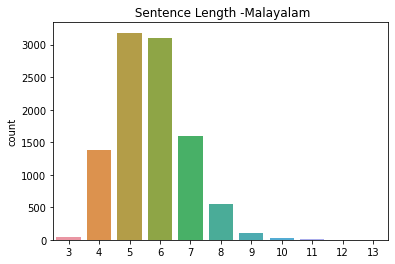

In [12]:
import seaborn as sn
import matplotlib.pyplot as plt
malayalam_words = []
for i in mal_text2:
    malayalam_words.append(len(i.split()))
sn.countplot(malayalam_words).set(title=' Sentence Length -Malayalam')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


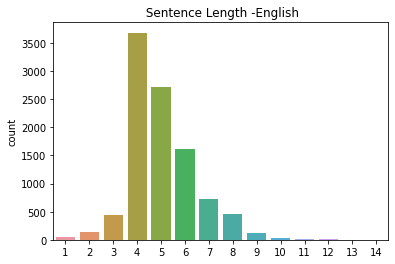

In [13]:
english_words = []
for j in eng_text2:
    english_words.append(len(j.split()))
sn.countplot(english_words).set(title=' Sentence Length -English')
plt.show()

In [14]:
maxlen_malayalam = max(malayalam_words)
maxlen_english = max(english_words)
print('Maximum sentence length-Malayalam :',maxlen_malayalam)
print('Maximum sentence length-English :',maxlen_english)

Maximum sentence length-Malayalam : 13
Maximum sentence length-English : 14


In [15]:
#splitting training data into training and validation data
x_tr=eng_text2[:splits-2000]
y_tr=mal_text2[:splits-2000]
x_val=eng_text2[splits-2000:]
y_val=mal_text2[splits-2000:]


In [16]:
x_tr[1:5]

['it is an indoor scene',
 'computer screens turned on',
 'man has short hair',
 'photo album open on an adults lap']

In [ ]:
y_tr[1:5]

['sos ഇത് ഒരു ഇൻഡോർ രംഗമാണ് eos',
 'sos കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി eos',
 'sos മനുഷ്യന് ചെറിയ മുടിയുണ്ട് eos',
 'sos ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു eos']

In [ ]:
len(x_tr)

9500

In [ ]:
len(x_val)

500

In [17]:
#Tokening the sentences using Keras tokenizer -Malayalam data
from keras.preprocessing.text import Tokenizer
x_tokens = Tokenizer()
x_tokens.fit_on_texts(x_tr)
x_tr = x_tokens.texts_to_sequences(x_tr)
x_val = x_tokens.texts_to_sequences(x_val)
print('x_tr:',x_tr)
print('x_val:',x_val)

x_tr: [[446, 223, 273, 6, 738, 6, 2, 265], [147, 5, 35, 1076, 192], [112, 1462, 447, 3], [8, 42, 239, 65], [203, 1463, 152, 3, 35, 1464, 643], [228, 5, 1, 185, 4, 477, 371, 2, 10, 31], [170, 6, 1, 850], [133, 113, 1465], [17, 5, 255, 7], [228, 41, 307, 644, 3, 2, 17], [18, 353, 2, 265], [14, 5, 35, 448, 1466], [308, 1077, 421], [1467, 5, 3, 1, 33], [1, 7, 309, 391], [7, 392, 229, 289, 575], [15, 322, 25, 11, 77], [8, 6, 91, 218, 323, 3, 13], [22, 3, 2, 13], [1, 8, 38, 6, 576, 372], [290, 110, 3, 17], [193, 4, 2, 102], [22, 4, 1, 86], [2, 324, 5, 164], [1, 8, 478, 1, 325], [1, 15, 851, 6, 30], [154, 11, 739, 373], [230, 3, 2, 46], [1, 645, 7, 46], [10, 168, 393], [1, 15, 1078, 525, 6, 2, 224, 4, 2, 31], [20, 31, 64, 394, 1, 25], [31, 3, 2, 25], [852, 1079, 19, 1468], [1, 10, 31, 11, 1, 23, 134], [102, 62, 2, 33], [1, 1469, 53, 3, 1, 210], [131, 291, 4, 1, 13], [22, 3, 1, 13], [21, 33, 38, 3, 55, 4, 1, 107], [107, 154, 5, 3], [1, 23, 48], [395, 4, 2, 54], [646, 63, 194, 2, 13], [577, 10,

In [18]:
#padding with post (appending zeros at the end to equalize sentence length)
from keras.preprocessing.sequence import pad_sequences
x_tr = pad_sequences(x_tr,maxlen = maxlen_english,padding = 'post')
x_val = pad_sequences(x_val,maxlen = maxlen_english,padding = 'post')

# +1 for padding 
x_voc_size   =  len(x_tokens.word_index) +1
print("No of unique words in English",x_voc_size)

No of unique words in English 2766


In [19]:
# English data preprocessing
from keras.preprocessing.text import Tokenizer
y_tokens = Tokenizer()
y_tokens.fit_on_texts(y_tr)

y_tr = y_tokens.texts_to_sequences(y_tr)
y_val = y_tokens.texts_to_sequences(y_val)

from keras.preprocessing.sequence import pad_sequences
y_tr = pad_sequences(y_tr,maxlen = maxlen_malayalam,padding = 'post')
y_val = pad_sequences(y_val,maxlen = maxlen_malayalam,padding = 'post')

# +1 for padding 
y_voc_size   =  len(y_tokens.word_index) +1
print("No of unique words in Malyalam",y_voc_size)


No of unique words in Malyalam 5094


In [20]:
pip install keras-applications

     |████████████████████████████████| 50 kB 3.2 MB/s 


In [21]:
import pandas as pd
import pickle
import numpy as np
import os
import keras
import tensorflow
from keras_applications.resnet import ResNet50
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, GlobalAveragePooling2D,BatchNormalization,Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model
from keras.utils import np_utils
import random
from keras.preprocessing import image, sequence
import matplotlib.pyplot as plt
import keras
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings


In [ ]:
#Loading VGG model for Feature Extraction-Removing classification layers from memory
modelvgg = VGG16(include_top=True,weights="imagenet")
modelvgg.layers.pop()
modelvgg = Model(inputs=modelvgg.inputs, outputs=modelvgg.layers[-2].output)
modelvgg.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
from keras.utils.vis_utils import plot_model
import tensorflow as tf

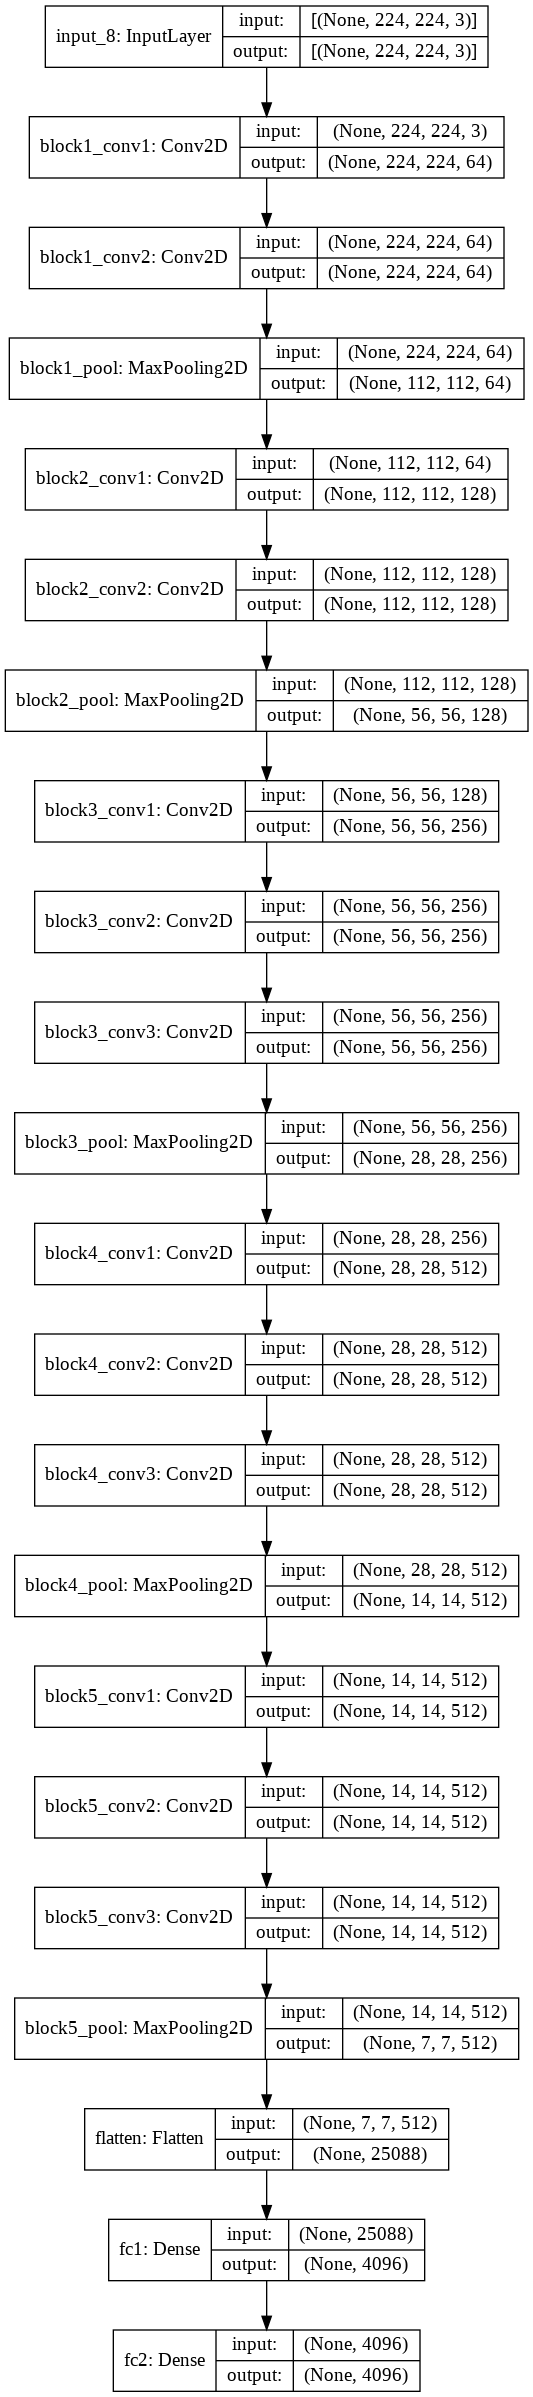

In [ ]:
tf.keras.utils.plot_model(
    modelvgg,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

In [ ]:
pip install cv

In [ ]:
import cv2
import cv

ERROR:root:Error disabling cv.imshow().
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/google/colab/_import_hooks/_cv2.py", line 86, in load_module
    cv_module.imshow,
AttributeError: module 'cv' has no attribute 'imshow'


In [ ]:
#tRY RESNET

In [ ]:
#Resizing image and converting grey scale images into RGB images
#split=5000
imagedata=np.zeros(shape=(splits,224,224,3))
for i in range(splits):
    temp=mp.imread(img_path[i])
    if (len(temp.shape)==3):
       temp=cv2.resize(temp,(224,224))
       imagedata[i]=temp
    elif (len(temp.shape)<3):
       #plt.imshow(temp)
       temp=cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
       temp=cv2.resize(temp,(224,224))
       imagedata[i]=temp    
imagedata=imagedata/255
imagedata=imagedata.astype(np.float16)

In [ ]:
temp1=mp.imread(img_path[1])
len(temp1)

600

In [ ]:
a=imagedata[1]
len(a)

224

In [ ]:
with open('/content/drive/My Drive/Main/imagedatas.txt', 'w') as writefile:
    writefile.write("imagedata")

In [ ]:
#preprocessing images
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from collections import OrderedDict
jpgs=img_path[:splits]
images_new = OrderedDict()
npix = 224
target_size = (npix,npix,3)
for i,name in enumerate(jpgs): 
    filename = name
    image = load_img(filename, target_size=target_size)
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    nimage = preprocess_input(image)
    y_pred = modelvgg.predict(nimage.reshape( (1,) + nimage.shape[:3]))
    images_new [name] = y_pred.flatten()
    if i%200==0:
        print(i,filename)

0 /content/drive/My Drive/Main/trainimages/train/10.jpg
200 /content/drive/My Drive/Main/trainimages/train/739.jpg
400 /content/drive/My Drive/Main/trainimages/train/1529.jpg
600 /content/drive/My Drive/Main/trainimages/train/2238.jpg
800 /content/drive/My Drive/Main/trainimages/train/2970.jpg


In [ ]:
print(list(images_new.values())[1])

[0.6324536 1.3856603 0.        ... 0.        0.        2.182263 ]


In [ ]:
#storing image pixels sepearetely
vgg_feature=np.zeros(shape=(len(jpgs),4096))
for i in range(len(jpgs)):
    vgg_feature[i]=images_new[jpgs[i]]
vgg_feature[1:10]

array([[0.63245589, 1.38566315, 0.        , ..., 0.        , 0.        ,
        2.18226528],
       [0.54209173, 0.        , 0.        , ..., 0.        , 0.        ,
        0.9331218 ],
       [1.52150476, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.11626506, 1.35216784, 0.05647528, ..., 0.        , 2.70661378,
        0.        ],
       [2.49456167, 1.68215251, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.26692492, 4.3635993 , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [22]:
import numpy as np
vgg_feature=np.load('/content/drive/My Drive/Main/effienet1.npy')

In [23]:
#splitting image pixels for training and validation
vgg_train_=vgg_feature[:splits-2000]
vgg_val=vgg_feature[splits-2000:]

In [40]:
#Generating a repeat vector from image pixels
img_inputs=Input(shape=(2560,))
d_1=Dense(512, activation='relu')(img_inputs)
r_1=RepeatVector(maxlen_english)(d_1)
vf_model = Model(img_inputs, r_1)
vf_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 2560)]            0         
                                                                 
 dense_2 (Dense)             (None, 512)               1311232   
                                                                 
 repeat_vector_2 (RepeatVect  (None, 14, 512)          0         
 or)                                                             
                                                                 
Total params: 1,311,232
Trainable params: 1,311,232
Non-trainable params: 0
_________________________________________________________________


In [26]:
x_voc=x_voc_size
y_voc=y_voc_size

In [35]:
#Model
x_voc=x_voc_size
y_voc=y_voc_size
latent_dim = 512
embedding_dim=512
#Encoder
encoder_inputs = Input(shape=(maxlen_english,))
#The model will take as input an integer matrix of size (batch,input_length)and the largest integer (i.e. word index) in the input
enc_emb =  Embedding(x_voc, 1024,trainable=True)(encoder_inputs)
print(encoder_inputs.get_shape)
print(enc_emb.get_shape)

<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, 14) dtype=float32 (created by layer 'input_5')>>
<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, 14, 1024) dtype=float32 (created by layer 'embedding_2')>>


In [36]:
#encoder LSTM Layer 1#merge_mode='sum'
encoder_lstm1 = Bidirectional(LSTM(256,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4))
#The dimension of each state equals to the LSTM unit number
encoder_output1= encoder_lstm1(enc_emb)
print(encoder_lstm1.output_shape)


[(None, 14, 512), (None, 256), (None, 256), (None, 256), (None, 256)]


In [37]:
#LSTM layer 2
encoder_lstm2 = Bidirectional(LSTM(256,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4))
encoder_output2 = encoder_lstm2(encoder_output1)
print(encoder_lstm2.output_shape)

[(None, 14, 512), (None, 256), (None, 256), (None, 256), (None, 256)]


In [38]:
encoder_output2

[<KerasTensor: shape=(None, 14, 512) dtype=float32 (created by layer 'bidirectional_1')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'bidirectional_1')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'bidirectional_1')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'bidirectional_1')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'bidirectional_1')>]

In [41]:
r_1

<KerasTensor: shape=(None, 14, 512) dtype=float32 (created by layer 'repeat_vector_2')>

In [42]:
encoder_output=encoder_output2[0]
encoder_output

<KerasTensor: shape=(None, 14, 512) dtype=float32 (created by layer 'bidirectional_1')>

In [43]:
encoder_output=Concatenate(axis=-1)([encoder_output,r_1])
encoder_output

<KerasTensor: shape=(None, 14, 1024) dtype=float32 (created by layer 'concatenate_1')>

In [44]:
encoder_output2[0]=encoder_output

In [45]:
#layer 3
encoder_lstm3= Bidirectional(LSTM(256, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4), name="encoder_lstm_3")
encoder_outputs, forward_h, forward_c, backward_h, backward_c= encoder_lstm3(encoder_output2)
encoder_states = [forward_h, forward_c, backward_h, backward_c]

In [46]:
state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])

In [47]:
encoder_states =[state_h, state_c]

In [48]:
#Decoder
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))
#embedding layer
dec_emb_layer = Embedding(y_voc, 1024,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
print(decoder_inputs.get_shape)
print(dec_emb.get_shape)

<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, None) dtype=float32 (created by layer 'input_7')>>
<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, None, 1024) dtype=float32 (created by layer 'embedding_3')>>


In [49]:
#Decoder LSTM layer1
decoder_lstm = LSTM(512, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=encoder_states)
print(decoder_lstm.output_shape)

[(None, None, 512), (None, 512), (None, 512)]


In [50]:
pip install --upgrade tensorflow==1.15.0

     |████████████████████████████████| 412.3 MB 18 kB/s 
     |████████████████████████████████| 3.8 MB 65.7 MB/s 
     |████████████████████████████████| 503 kB 76.1 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=83b96e50be26564e3a57ea67d47ee7d3b65ab685a0847ed75ec50de9d6547cdd
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: te

In [51]:
import tensorflow as tf
import os
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import keras
from keras import backend as K
from keras import activations, initializers, regularizers, constraints, metrics
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import (Dense, Dropout, Activation, Flatten, Reshape, Layer,
                          BatchNormalization, LocallyConnected2D,
                          ZeroPadding2D, Conv2D, MaxPooling2D, Conv2DTranspose,
                          GaussianNoise, UpSampling2D, Input)
#from keras.utils import conv_utils, multi_gpu_model
from keras.layers import Lambda
#from keras.engine import Layer, InputSpec
#from keras.legacy import interfaces


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state
            inputs: (batchsize * 1 * de_in_dim)
            states: (batchsize * 1 * de_latent_dim)
            """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch size * en_seq_len * latent_dim
            W_a_dot_s = K.dot(encoder_out_seq, self.W_a)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>', U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            Ws_plus_Uh = K.tanh(W_a_dot_s + U_a_dot_h)
            if verbose:
                print('Ws+Uh>', Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.squeeze(K.dot(Ws_plus_Uh, self.V_a), axis=-1)
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        fake_state_c = K.sum(encoder_out_seq, axis=1)
        fake_state_e = K.sum(encoder_out_seq, axis=2)  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [52]:
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

In [53]:
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

In [54]:
#dense = Dense(fr_vsize, activation='softmax', name='softmax_layer')
#dense_time = TimeDistributed(dense, name='time_distributed_layer')
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)
#decoder_output = dense_time(decoder_concat_input)
print(decoder_dense.output_shape)

(None, None, 5094)


In [55]:
model = Model([encoder_inputs,decoder_inputs,img_inputs], decoder_outputs)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 14)]         0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 14, 1024)     2832384     ['input_5[0][0]']                
                                                                                                  
 input_6 (InputLayer)           [(None, 2560)]       0           []                               
                                                                                                  
 bidirectional (Bidirectional)  [(None, 14, 512),    2623488     ['embedding_2[0][0]']            
                                 (None, 256),                                               

In [56]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("/content/drive/My Drive/Main/efficeinetmodel1", monitor='val_accuracy')

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

callbacks_list = [checkpoint, early_stopping]

In [57]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit([x_tr,y_tr[:,:-1],vgg_train_], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,validation_data=([x_val,y_val[:,:-1],vgg_val], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]),epochs=100,batch_size=512,callbacks= callbacks_list)

Epoch 1/100
16/16 [==============================] - ETA: 0s - loss: 3.8572 - accuracy: 0.5808WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77b2e14d0> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77b2e14d0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77b2e14d0>. Note that functions defined in certain environments, like the interacti

16/16 [==============================] - 83s 4s/step - loss: 3.8572 - accuracy: 0.5808 - val_loss: 2.1483 - val_accuracy: 0.6761
Epoch 2/100
16/16 [==============================] - ETA: 0s - loss: 2.3215 - accuracy: 0.6697WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77b62c170> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77b62c170>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77b62c170>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77b62c170>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 2.3215 - accuracy: 0.6697 - val_loss: 1.9795 - val_accuracy: 0.7098
Epoch 3/100
16/16 [==============================] - ETA: 0s - loss: 2.1790 - accuracy: 0.7051WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77611d0e0> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77611d0e0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77611d0e0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77611d0e0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 2.1790 - accuracy: 0.7051 - val_loss: 1.8614 - val_accuracy: 0.7398
Epoch 4/100
16/16 [==============================] - ETA: 0s - loss: 2.0757 - accuracy: 0.7140WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77801ab90> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77801ab90>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77801ab90>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77801ab90>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 66s 4s/step - loss: 2.0757 - accuracy: 0.7140 - val_loss: 1.7964 - val_accuracy: 0.7422
Epoch 5/100
16/16 [==============================] - ETA: 0s - loss: 1.9921 - accuracy: 0.7191WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff775e05050> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff775e05050>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff775e05050>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff775e05050>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 1.9921 - accuracy: 0.7191 - val_loss: 1.7439 - val_accuracy: 0.7468
Epoch 6/100
16/16 [==============================] - ETA: 0s - loss: 1.9016 - accuracy: 0.7297WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff7764feb90> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff7764feb90>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff7764feb90>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff7764feb90>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 66s 4s/step - loss: 1.9016 - accuracy: 0.7297 - val_loss: 1.6971 - val_accuracy: 0.7509
Epoch 7/100
16/16 [==============================] - ETA: 0s - loss: 1.8016 - accuracy: 0.7403WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff776f577a0> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff776f577a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff776f577a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff776f577a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 1.8016 - accuracy: 0.7403 - val_loss: 1.6252 - val_accuracy: 0.7603
Epoch 8/100
16/16 [==============================] - ETA: 0s - loss: 1.6938 - accuracy: 0.7492WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77beb5ef0> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77beb5ef0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77beb5ef0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77beb5ef0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 1.6938 - accuracy: 0.7492 - val_loss: 1.5623 - val_accuracy: 0.7696
Epoch 9/100
16/16 [==============================] - ETA: 0s - loss: 1.5855 - accuracy: 0.7567WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77c51c8c0> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77c51c8c0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77c51c8c0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77c51c8c0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 1.5855 - accuracy: 0.7567 - val_loss: 1.4950 - val_accuracy: 0.7735
Epoch 10/100
16/16 [==============================] - ETA: 0s - loss: 1.4803 - accuracy: 0.7626WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77a224710> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77a224710>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77a224710>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77a224710>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 66s 4s/step - loss: 1.4803 - accuracy: 0.7626 - val_loss: 1.4450 - val_accuracy: 0.7778
Epoch 11/100
16/16 [==============================] - ETA: 0s - loss: 1.3759 - accuracy: 0.7692WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77679c290> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77679c290>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77679c290>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77679c290>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 1.3759 - accuracy: 0.7692 - val_loss: 1.4077 - val_accuracy: 0.7807
Epoch 12/100
16/16 [==============================] - ETA: 0s - loss: 1.2736 - accuracy: 0.7762WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77acf5320> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77acf5320>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77acf5320>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77acf5320>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 1.2736 - accuracy: 0.7762 - val_loss: 1.3739 - val_accuracy: 0.7870
Epoch 13/100
16/16 [==============================] - ETA: 0s - loss: 1.1790 - accuracy: 0.7837WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff778cc5b90> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff778cc5b90>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff778cc5b90>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff778cc5b90>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 1.1790 - accuracy: 0.7837 - val_loss: 1.3580 - val_accuracy: 0.7872
Epoch 14/100
16/16 [==============================] - ETA: 0s - loss: 1.0899 - accuracy: 0.7906WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff7780b54d0> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff7780b54d0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff7780b54d0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff7780b54d0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 1.0899 - accuracy: 0.7906 - val_loss: 1.3358 - val_accuracy: 0.7916
Epoch 15/100
16/16 [==============================] - ETA: 0s - loss: 1.0059 - accuracy: 0.7987WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff779569830> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff779569830>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff779569830>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff779569830>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 1.0059 - accuracy: 0.7987 - val_loss: 1.3260 - val_accuracy: 0.7917
Epoch 16/100
16/16 [==============================] - ETA: 0s - loss: 0.9259 - accuracy: 0.8097WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77b657d40> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77b657d40>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77b657d40>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77b657d40>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 66s 4s/step - loss: 0.9259 - accuracy: 0.8097 - val_loss: 1.3266 - val_accuracy: 0.7923
Epoch 17/100
16/16 [==============================] - ETA: 0s - loss: 0.8505 - accuracy: 0.8218WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff779f06290> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff779f06290>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff779f06290>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff779f06290>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 0.8505 - accuracy: 0.8218 - val_loss: 1.3160 - val_accuracy: 0.7950
Epoch 18/100
16/16 [==============================] - ETA: 0s - loss: 0.7786 - accuracy: 0.8363WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff779e8cb00> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff779e8cb00>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff779e8cb00>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff779e8cb00>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 0.7786 - accuracy: 0.8363 - val_loss: 1.3288 - val_accuracy: 0.7931
Epoch 19/100
16/16 [==============================] - ETA: 0s - loss: 0.7116 - accuracy: 0.8492WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77accfb90> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77accfb90>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77accfb90>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77accfb90>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 0.7116 - accuracy: 0.8492 - val_loss: 1.3222 - val_accuracy: 0.7946
Epoch 20/100
16/16 [==============================] - ETA: 0s - loss: 0.6467 - accuracy: 0.8638WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77a616d40> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77a616d40>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77a616d40>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77a616d40>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 66s 4s/step - loss: 0.6467 - accuracy: 0.8638 - val_loss: 1.3102 - val_accuracy: 0.7980
Epoch 21/100
16/16 [==============================] - ETA: 0s - loss: 0.5882 - accuracy: 0.8757WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff774798cb0> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff774798cb0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff774798cb0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff774798cb0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 0.5882 - accuracy: 0.8757 - val_loss: 1.3007 - val_accuracy: 0.7999
Epoch 22/100
16/16 [==============================] - ETA: 0s - loss: 0.5349 - accuracy: 0.8876WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77c817830> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77c817830>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77c817830>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77c817830>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 0.5349 - accuracy: 0.8876 - val_loss: 1.3138 - val_accuracy: 0.7969
Epoch 23/100
16/16 [==============================] - ETA: 0s - loss: 0.4849 - accuracy: 0.8987WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff776bde320> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff776bde320>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff776bde320>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff776bde320>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 0.4849 - accuracy: 0.8987 - val_loss: 1.3124 - val_accuracy: 0.7977
Epoch 24/100
16/16 [==============================] - ETA: 0s - loss: 0.4375 - accuracy: 0.9088WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77a8f87a0> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77a8f87a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77a8f87a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77a8f87a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 0.4375 - accuracy: 0.9088 - val_loss: 1.2946 - val_accuracy: 0.8020
Epoch 25/100
16/16 [==============================] - ETA: 0s - loss: 0.3978 - accuracy: 0.9181WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff7777d9a70> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff7777d9a70>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff7777d9a70>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff7777d9a70>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 66s 4s/step - loss: 0.3978 - accuracy: 0.9181 - val_loss: 1.3011 - val_accuracy: 0.8007
Epoch 26/100
16/16 [==============================] - ETA: 0s - loss: 0.3612 - accuracy: 0.9263WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77672b710> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77672b710>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77672b710>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77672b710>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 0.3612 - accuracy: 0.9263 - val_loss: 1.2993 - val_accuracy: 0.8013
Epoch 27/100
16/16 [==============================] - ETA: 0s - loss: 0.3242 - accuracy: 0.9350WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff777072320> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff777072320>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff777072320>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff777072320>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 0.3242 - accuracy: 0.9350 - val_loss: 1.3005 - val_accuracy: 0.8024
Epoch 28/100
16/16 [==============================] - ETA: 0s - loss: 0.2908 - accuracy: 0.9438WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff7747595f0> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff7747595f0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff7747595f0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff7747595f0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 0.2908 - accuracy: 0.9438 - val_loss: 1.2973 - val_accuracy: 0.8022
Epoch 29/100
16/16 [==============================] - ETA: 0s - loss: 0.2620 - accuracy: 0.9505WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77b13cf80> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77b13cf80>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77b13cf80>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77b13cf80>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 66s 4s/step - loss: 0.2620 - accuracy: 0.9505 - val_loss: 1.2980 - val_accuracy: 0.8044
Epoch 30/100
16/16 [==============================] - ETA: 0s - loss: 0.2354 - accuracy: 0.9571WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff779c48170> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff779c48170>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff779c48170>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff779c48170>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 66s 4s/step - loss: 0.2354 - accuracy: 0.9571 - val_loss: 1.3054 - val_accuracy: 0.8028
Epoch 31/100
16/16 [==============================] - ETA: 0s - loss: 0.2129 - accuracy: 0.9624WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77bf43e60> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77bf43e60>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77bf43e60>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77bf43e60>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 66s 4s/step - loss: 0.2129 - accuracy: 0.9624 - val_loss: 1.3073 - val_accuracy: 0.8055
Epoch 32/100
16/16 [==============================] - ETA: 0s - loss: 0.1910 - accuracy: 0.9684WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff7751adef0> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff7751adef0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff7751adef0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff7751adef0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 66s 4s/step - loss: 0.1910 - accuracy: 0.9684 - val_loss: 1.3184 - val_accuracy: 0.8030
Epoch 33/100
16/16 [==============================] - ETA: 0s - loss: 0.1720 - accuracy: 0.9729WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77b889cb0> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77b889cb0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77b889cb0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77b889cb0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 66s 4s/step - loss: 0.1720 - accuracy: 0.9729 - val_loss: 1.3112 - val_accuracy: 0.8050
Epoch 34/100
16/16 [==============================] - ETA: 0s - loss: 0.1547 - accuracy: 0.9770WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff777b8c290> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff777b8c290>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff777b8c290>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff777b8c290>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 0.1547 - accuracy: 0.9770 - val_loss: 1.3158 - val_accuracy: 0.8052
Epoch 35/100
16/16 [==============================] - ETA: 0s - loss: 0.1396 - accuracy: 0.9809WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff774c2ddd0> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff774c2ddd0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff774c2ddd0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff774c2ddd0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 0.1396 - accuracy: 0.9809 - val_loss: 1.3156 - val_accuracy: 0.8059
Epoch 36/100
16/16 [==============================] - ETA: 0s - loss: 0.1266 - accuracy: 0.9829WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77bcb7290> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77bcb7290>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77bcb7290>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77bcb7290>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 0.1266 - accuracy: 0.9829 - val_loss: 1.3111 - val_accuracy: 0.8065
Epoch 37/100
16/16 [==============================] - ETA: 0s - loss: 0.1143 - accuracy: 0.9862WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff779a77b00> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff779a77b00>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff779a77b00>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff779a77b00>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 0.1143 - accuracy: 0.9862 - val_loss: 1.3249 - val_accuracy: 0.8049
Epoch 38/100
16/16 [==============================] - ETA: 0s - loss: 0.1039 - accuracy: 0.9876WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77ad80cb0> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77ad80cb0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77ad80cb0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77ad80cb0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 0.1039 - accuracy: 0.9876 - val_loss: 1.3261 - val_accuracy: 0.8065
Epoch 39/100
16/16 [==============================] - ETA: 0s - loss: 0.0934 - accuracy: 0.9901WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77a8757a0> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77a8757a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77a8757a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77a8757a0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 0.0934 - accuracy: 0.9901 - val_loss: 1.3317 - val_accuracy: 0.8054
Epoch 40/100
16/16 [==============================] - ETA: 0s - loss: 0.0840 - accuracy: 0.9915WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77b9c5680> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77b9c5680>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77b9c5680>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff77b9c5680>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 0.0840 - accuracy: 0.9915 - val_loss: 1.3370 - val_accuracy: 0.8055
Epoch 41/100
16/16 [==============================] - ETA: 0s - loss: 0.0770 - accuracy: 0.9931WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff776901cb0> and will run it as-is.
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff776901cb0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff776901cb0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x7ff776901cb0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/efficeinetmodel1/assets


16/16 [==============================] - 65s 4s/step - loss: 0.0770 - accuracy: 0.9931 - val_loss: 1.3371 - val_accuracy: 0.8060


In [58]:
from keras.utils.vis_utils import plot_model
import tensorflow as tf

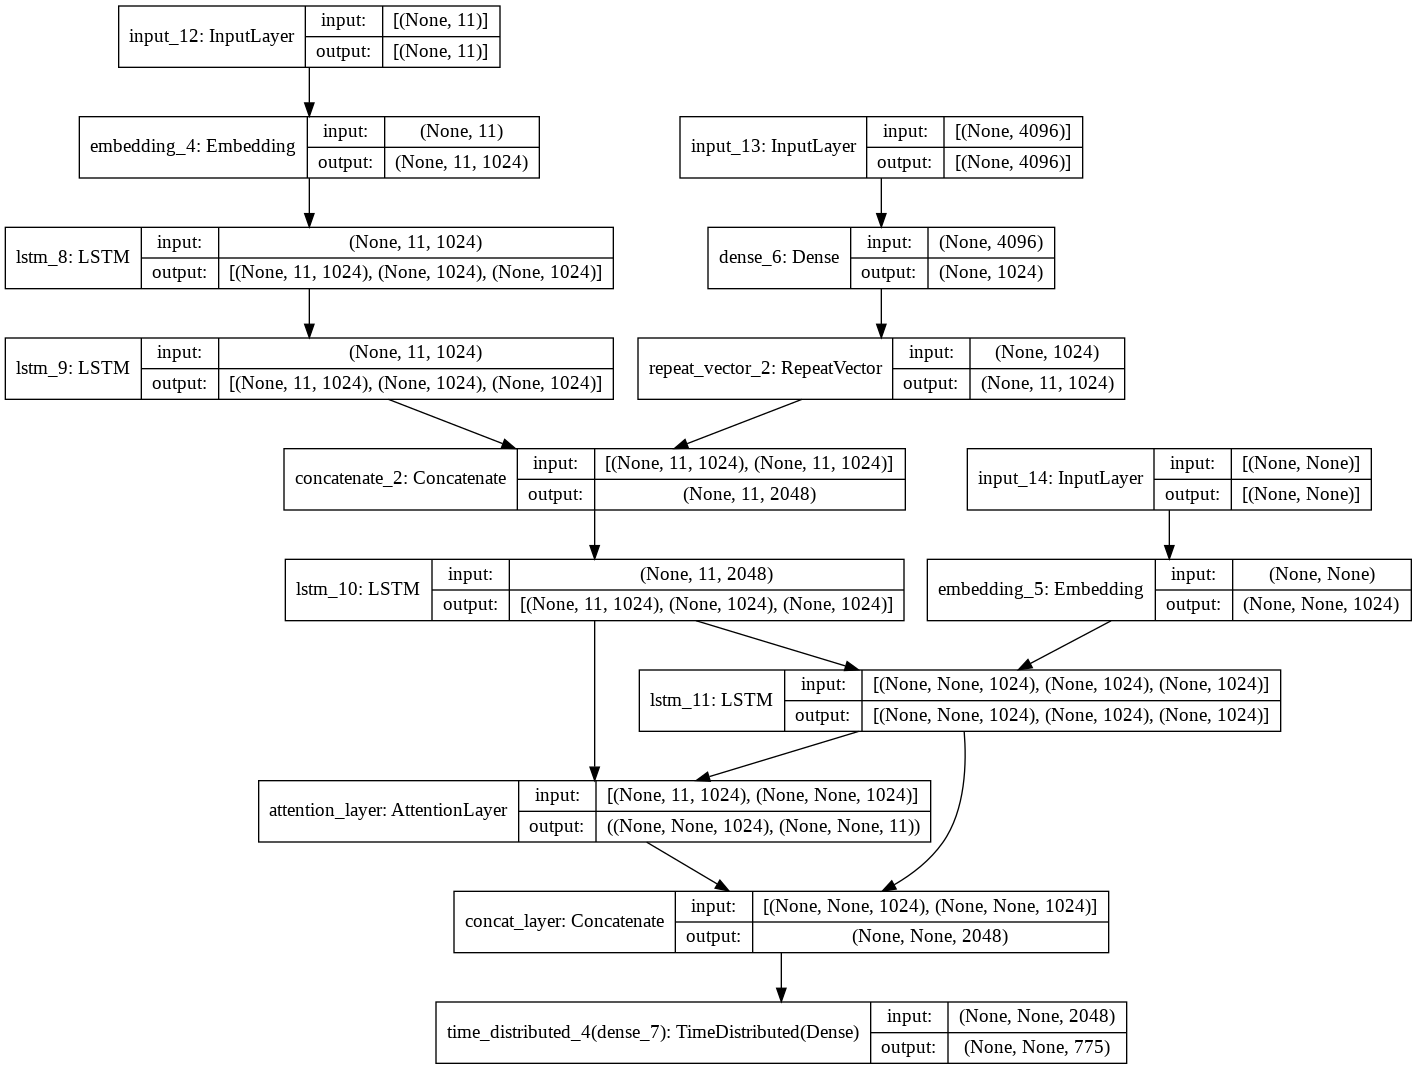

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

In [ ]:
in

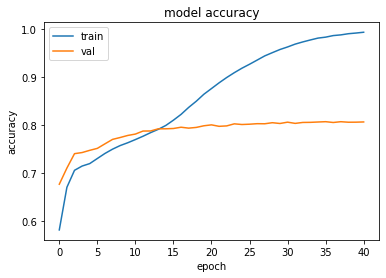

In [59]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

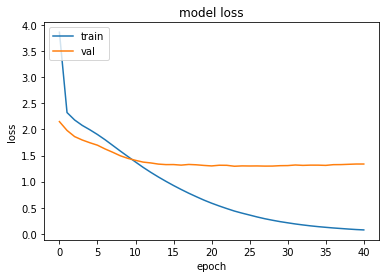

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [61]:
reverse_target_word_index=y_tokens.index_word
reverse_target_word_index

{1: 'sos',
 2: 'eos',
 3: 'ഒരു',
 4: 'കറുത്ത',
 5: 'വെളുത്ത',
 6: 'സ്ത്രീ',
 7: 'ധരിച്ച',
 8: 'മനുഷ്യൻ',
 9: 'പച്ച',
 10: 'ബാഗ്',
 11: 'വലിയ',
 12: 'നീല',
 13: 'വർണ്ണാഭമായ',
 14: 'ചുവന്ന',
 15: 'ട്രാഷ്',
 16: 'ചാരനിറത്തിലുള്ള',
 17: 'സ്കാർഫ്',
 18: 'വിൻഡോ',
 19: 'മഞ്ഞ',
 20: 'ഇതൊരു',
 21: 'റോഡിന്റെ',
 22: 'വ്യക്തി',
 23: 'കെട്ടിടത്തിലെ',
 24: 'പുല്ലിന്റെ',
 25: 'രണ്ട്',
 26: 'ചെറിയ',
 27: 'വശങ്ങളിൽ',
 28: 'സ്ട്രിപ്പുകൾ',
 29: 'ആന',
 30: 'നിലത്ത്',
 31: 'വെള്ള',
 32: 'ഉള്ള',
 33: 'ചുവപ്പ്',
 34: 'തവിട്ട്',
 35: 'കുഞ്ഞ്',
 36: 'ഒരാൾ',
 37: 'കാർ',
 38: 'ജിറാഫ്',
 39: 'കെട്ടിടത്തിന്റെ',
 40: 'മുകളിൽ',
 41: 'ഓറഞ്ച്',
 42: 'വെള്ളയും',
 43: 'പുല്ല്',
 44: 'എഞ്ചിൻ',
 45: 'മേശപ്പുറത്ത്',
 46: 'രംഗം',
 47: 'ചിഹ്നം',
 48: 'നിറമുള്ള',
 49: 'ബീച്ച്',
 50: 'വശത്ത്',
 51: 'ആളുകൾ',
 52: 'ടെന്നീസ്',
 53: 'ദ്വീപ്',
 54: 'തലം',
 55: 'മതിൽ',
 56: 'പുള്ളി',
 57: 'ഇരിക്കുന്നു',
 58: 'ട്രെയിൻ',
 59: 'ഇത്',
 60: 'മരം',
 61: 'നിൽക്കുന്ന',
 62: 'തെരുവിൽ',
 63: 'തിന്നുന്നു',
 64: 'നായ',
 65: 'പാർക്ക്',
 66: 'ബസ്

In [62]:

reverse_source_word_index=x_tokens.index_word
reverse_source_word_index

{1: 'a',
 2: 'the',
 3: 'on',
 4: 'of',
 5: 'is',
 6: 'in',
 7: 'white',
 8: 'man',
 9: 'and',
 10: 'black',
 11: 'with',
 12: 'red',
 13: 'building',
 14: 'this',
 15: 'person',
 16: 'blue',
 17: 'wall',
 18: 'woman',
 19: 'wearing',
 20: 'green',
 21: 'brown',
 22: 'window',
 23: 'yellow',
 24: 'sign',
 25: 'street',
 26: 'side',
 27: 'two',
 28: 'sky',
 29: 'head',
 30: 'water',
 31: 'car',
 32: 'train',
 33: 'table',
 34: 'light',
 35: 'an',
 36: 'shirt',
 37: 'large',
 38: 'standing',
 39: 'sitting',
 40: 'clock',
 41: 'are',
 42: 'has',
 43: 'holding',
 44: 'people',
 45: 'road',
 46: 'plate',
 47: 'small',
 48: 'bus',
 49: 'to',
 50: 'dog',
 51: 'grass',
 52: 'tennis',
 53: 'orange',
 54: 'tree',
 55: 'top',
 56: 'silver',
 57: 'boy',
 58: 'cat',
 59: 'walking',
 60: 'ground',
 61: 'plane',
 62: 'at',
 63: 'bench',
 64: 'parked',
 65: 'hair',
 66: 'front',
 67: 'glass',
 68: 'truck',
 69: 'wooden',
 70: 'girl',
 71: 'bear',
 72: 'field',
 73: 'bird',
 74: 'baseball',
 75: 'part'

In [63]:

target_word_index=y_tokens.word_index
target_word_index

{'sos': 1,
 'eos': 2,
 'ഒരു': 3,
 'കറുത്ത': 4,
 'വെളുത്ത': 5,
 'സ്ത്രീ': 6,
 'ധരിച്ച': 7,
 'മനുഷ്യൻ': 8,
 'പച്ച': 9,
 'ബാഗ്': 10,
 'വലിയ': 11,
 'നീല': 12,
 'വർണ്ണാഭമായ': 13,
 'ചുവന്ന': 14,
 'ട്രാഷ്': 15,
 'ചാരനിറത്തിലുള്ള': 16,
 'സ്കാർഫ്': 17,
 'വിൻഡോ': 18,
 'മഞ്ഞ': 19,
 'ഇതൊരു': 20,
 'റോഡിന്റെ': 21,
 'വ്യക്തി': 22,
 'കെട്ടിടത്തിലെ': 23,
 'പുല്ലിന്റെ': 24,
 'രണ്ട്': 25,
 'ചെറിയ': 26,
 'വശങ്ങളിൽ': 27,
 'സ്ട്രിപ്പുകൾ': 28,
 'ആന': 29,
 'നിലത്ത്': 30,
 'വെള്ള': 31,
 'ഉള്ള': 32,
 'ചുവപ്പ്': 33,
 'തവിട്ട്': 34,
 'കുഞ്ഞ്': 35,
 'ഒരാൾ': 36,
 'കാർ': 37,
 'ജിറാഫ്': 38,
 'കെട്ടിടത്തിന്റെ': 39,
 'മുകളിൽ': 40,
 'ഓറഞ്ച്': 41,
 'വെള്ളയും': 42,
 'പുല്ല്': 43,
 'എഞ്ചിൻ': 44,
 'മേശപ്പുറത്ത്': 45,
 'രംഗം': 46,
 'ചിഹ്നം': 47,
 'നിറമുള്ള': 48,
 'ബീച്ച്': 49,
 'വശത്ത്': 50,
 'ആളുകൾ': 51,
 'ടെന്നീസ്': 52,
 'ദ്വീപ്': 53,
 'തലം': 54,
 'മതിൽ': 55,
 'പുള്ളി': 56,
 'ഇരിക്കുന്നു': 57,
 'ട്രെയിൻ': 58,
 'ഇത്': 59,
 'മരം': 60,
 'നിൽക്കുന്ന': 61,
 'തെരുവിൽ': 62,
 'തിന്നുന്നു': 63,
 'നായ': 64,
 'പാർക്ക്': 65,
 'ബസ്': 6

In [64]:

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=[encoder_inputs,img_inputs],outputs=[encoder_outputs,state_h,state_c])
encoder_model.summary()

#state_h, state_c]

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 14)]         0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 14, 1024)     2832384     ['input_5[0][0]']                
                                                                                                  
 input_6 (InputLayer)           [(None, 2560)]       0           []                               
                                                                                                  
 bidirectional (Bidirectional)  [(None, 14, 512),    2623488     ['embedding_2[0][0]']            
                                 (None, 256),                                               

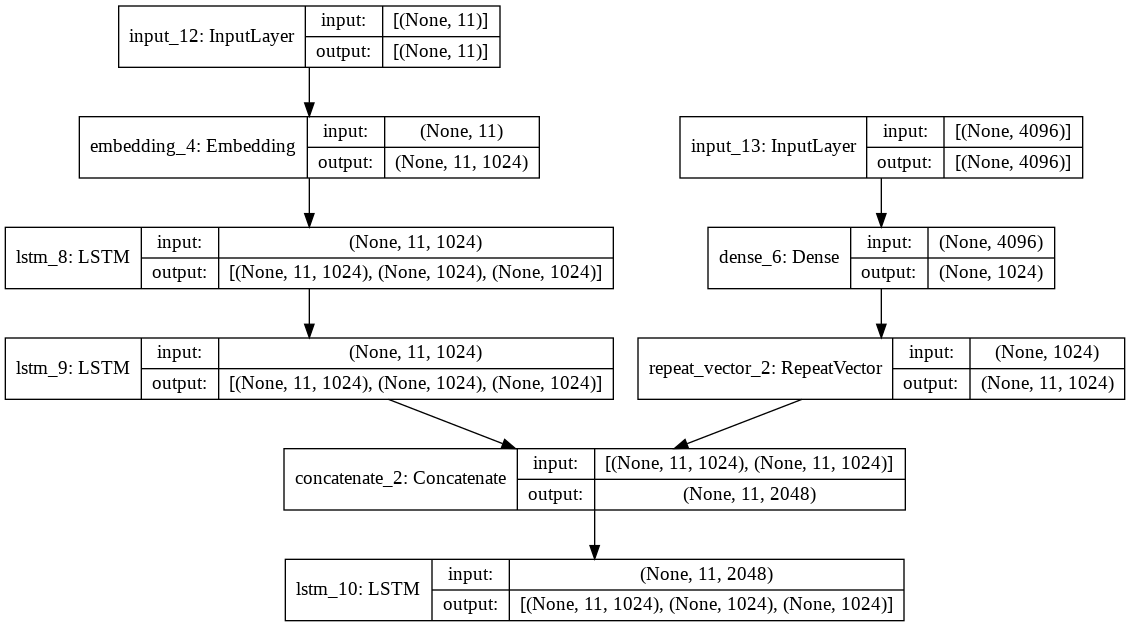

In [ ]:
tf.keras.utils.plot_model(
    encoder_model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

In [65]:
# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(512,))
decoder_state_input_c = Input(shape=(512,))
encoder_inf_states=Input(shape=(maxlen_english,512,))
decoder_hidden_state_input = Input(shape=(maxlen_english,512))
print(decoder_inputs.get_shape)
#print(dec_emb.get_shape)

<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, None) dtype=float32 (created by layer 'input_7')>>


In [ ]:
maxlen_english

11

In [ ]:
decoder_state_input_c 

<KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'input_22')>

In [66]:
dec_states = [decoder_state_input_h, decoder_state_input_c]

In [67]:

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=dec_states)
attn_inf_out, attn_inf_states = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_inf_out]) 

In [68]:

dec_states2= [state_h2, state_c2]

decoder_outputs2 = decoder_dense(decoder_inf_concat)

In [70]:
decoder_model= Model(
                    [decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
                     [decoder_outputs2]+ dec_states2)
decoder_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, None, 1024)   5216256     ['input_7[0][0]']                
                                                                                                  
 input_8 (InputLayer)           [(None, 512)]        0           []                               
                                                                                                  
 input_9 (InputLayer)           [(None, 512)]        0           []                               
                                                                                            

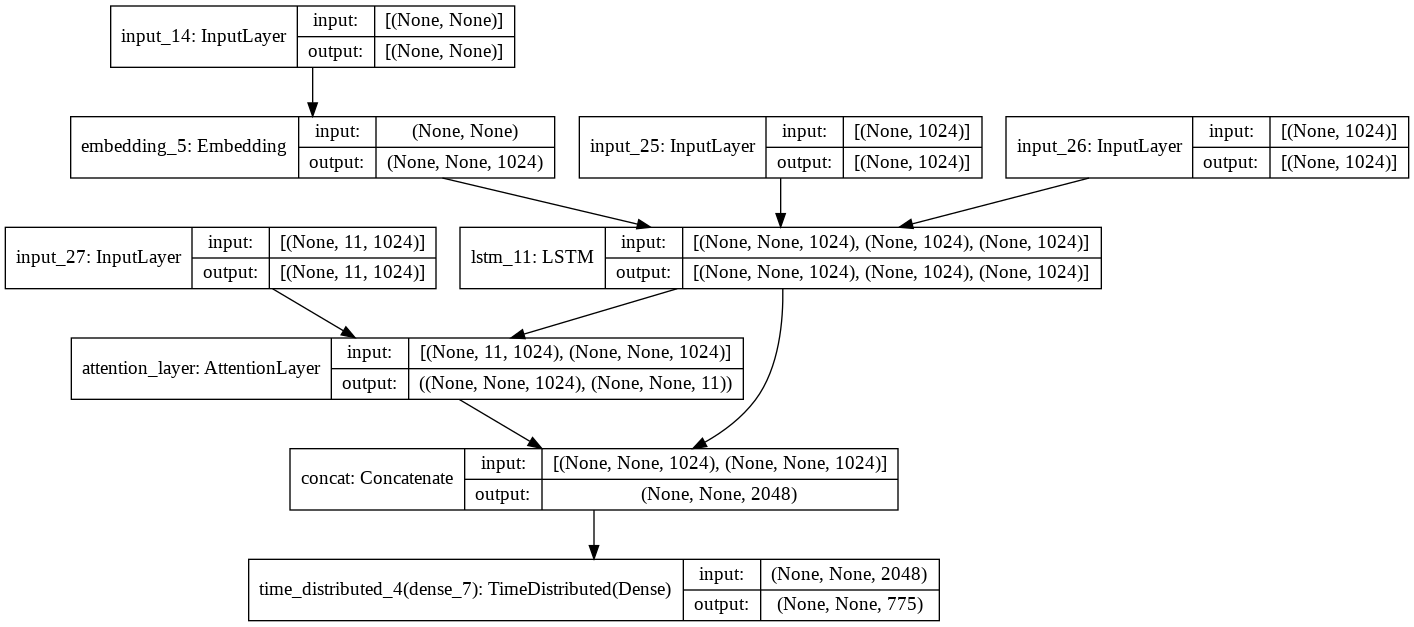

In [ ]:
tf.keras.utils.plot_model(
    decoder_model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

In [71]:
def decode_sequence(input_seq,img):
    img=img[np.newaxis,:]
    # Encode the input as state vectors.
    enc_output, enc_h, enc_c   = encoder_model.predict([input_seq,img])
    

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sos']

    stop_condition = False
    decoded_sentence = ''
    attention_weights=[]
    while not stop_condition:
      
        output_tokens, h, c  = decoder_model.predict([target_seq] + [enc_output, enc_h, enc_c ])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        if sampled_token_index == 0:
            break
        else:
            sampled_token = reverse_target_word_index[sampled_token_index]
        #attention_weights.append((sampled_token_index, attention))
        if(sampled_token!='eos'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eos'  or len(decoded_sentence.split()) >= (maxlen_malayalam -1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        enc_h, enc_c = h, c

    return decoded_sentence

In [72]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sos']) and i!=target_word_index['eos']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

for i in range(5):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,maxlen_english),vgg_train_[i]))
    print("\n")

Review: male surfer surfing in still in the ocean 
Original summary: ശാന്തമായ കടലിൽ സർഫിങ് നടത്തുന്ന പുരുഷ സർഫർ 
Predicted summary:  ശാന്തമായ കടലിൽ സർഫിങ് നടത്തുന്ന പുരുഷ സർഫർ


Review: it is an indoor scene 
Original summary: ഇത് ഒരു ഇൻഡോർ രംഗമാണ് 
Predicted summary:  ഇത് ഒരു ഇൻഡോർ രംഗമാണ്


Review: computer screens turned on 
Original summary: കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി 
Predicted summary:  കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി


Review: man has short hair 
Original summary: മനുഷ്യന് ചെറിയ മുടിയുണ്ട് 
Predicted summary:  മനുഷ്യന് ചെറിയ മുടിയുണ്ട്


Review: photo album open on an adults lap 
Original summary: ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു 
Predicted summary:  ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു




In [76]:
with open('/content/drive/My Drive/Main/train_images.txt') as file:
    train_images = file.read().split('\n')
img_path=[]
for s in train_images:
    img_path.append("/content/drive/My Drive/Main/train/"+s)

Review: photo album open on an adults lap 
Original summary: ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു 
Predicted summary:  ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു


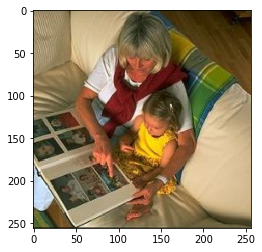

In [78]:
i=4
print("Review:",seq2text(x_tr[i]))
print("Original summary:",seq2summary(y_tr[i]))
print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,maxlen_english),vgg_train_[i]))
im=mp.imread(img_path[i])
plt.imshow(im)

Review: male surfer surfing in still in the ocean 
Original summary: ശാന്തമായ കടലിൽ സർഫിങ് നടത്തുന്ന പുരുഷ സർഫർ 
Predicted summary:  ശാന്തമായ കടലിൽ സർഫിങ് നടത്തുന്ന പുരുഷ സർഫർ


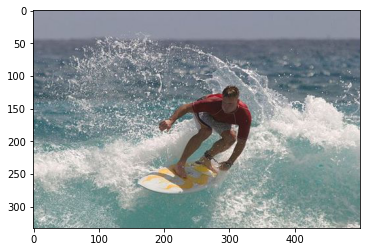

In [80]:
i=0
print("Review:",seq2text(x_tr[i]))
print("Original summary:",seq2summary(y_tr[i]))
print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,maxlen_english),vgg_train_[i]))
im=mp.imread(img_path[i])
plt.imshow(im)

Review: small of water behind the tracks 
Original summary: ട്രാക്കുകൾക്ക് പുറകിലുള്ള ചെറിയ 
Predicted summary:  ട്രെയിൻ ട്രാക്കുകളിൽ ട്രെയിൻ ഓടുന്നു


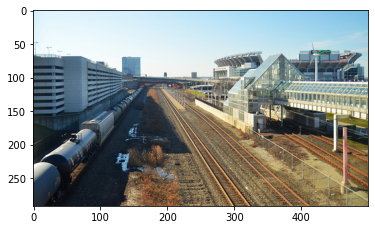

In [85]:
i=195
print("Review:",seq2text(x_val[i]))
print("Original summary:",seq2summary(y_val[i]))
print("Predicted summary:",decode_sequence(x_val[i].reshape(1,maxlen_english),vgg_val[i]))
im=mp.imread(img_path[8196])
plt.imshow(im)

Review: white dot on pink luggage 
Original summary: ഒരു കെട്ടിടത്തിലെ വലിയ വിൻഡോ 
Predicted summary:  വെള്ള കറുപ്പ് മുകളിലുള്ള ചിത്രം


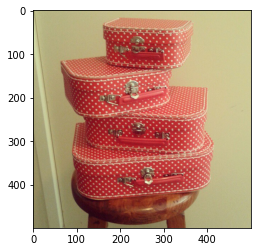

In [86]:
i=197
print("Review:",seq2text(x_val[i]))
print("Original summary:",seq2summary(y_val[i]))
print("Predicted summary:",decode_sequence(x_val[i].reshape(1,maxlen_english),vgg_val[i]))
im=mp.imread(img_path[8198])
plt.imshow(im)

Review: a person is out in the snow 
Original summary: ഒരു വ്യക്തി 
Predicted summary:  ഒരു വ്യക്തി എഴുന്നേറ്റു ചരിവ് ചെയ്യുന്നു


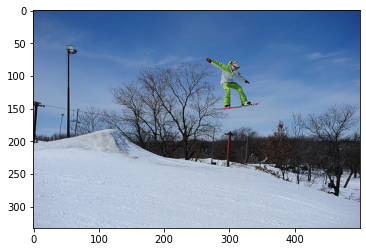

In [87]:
i=501
print("Review:",seq2text(x_val[i]))
print("Original summary:",seq2summary(y_val[i]))
print("Predicted summary:",decode_sequence(x_val[i].reshape(1,maxlen_english),vgg_val[i]))
im=mp.imread(img_path[8001+501])
plt.imshow(im)

Review: furry cover on toilet seat cover 
Original summary: ടോയ്‌ലറ്റ് സീറ്റ് 
Predicted summary:  കുളിമുറിയുടെ ടൂത്ത് ബ്രഷുകൾ ഒരു ടോയ്‌ലറ്റ്


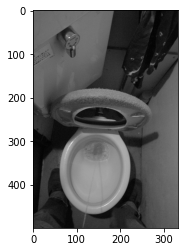

In [88]:
i=601
print("Review:",seq2text(x_val[i]))
print("Original summary:",seq2summary(y_val[i]))
print("Predicted summary:",decode_sequence(x_val[i].reshape(1,maxlen_english),vgg_val[i]))
im=mp.imread(img_path[8001+601])
plt.imshow(im)

Review: standing woman looking down at water 
Original summary: നിൽക്കുന്ന സ്ത്രീ നോക്കുന്നു 
Predicted summary:  കടൽത്തീരത്ത് നിൽക്കുന്ന സ്ത്രീ


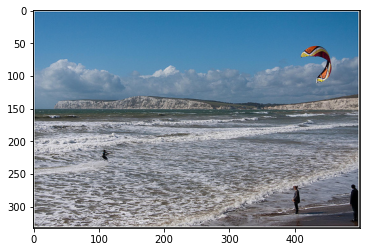

In [89]:
i=701
print("Review:",seq2text(x_val[i]))
print("Original summary:",seq2summary(y_val[i]))
print("Predicted summary:",decode_sequence(x_val[i].reshape(1,maxlen_english),vgg_val[i]))
im=mp.imread(img_path[8001+701])
plt.imshow(im)

Review: apple laptop computer 
Original summary: ആപ്പിൾ ലാപ്‌ടോപ്പ് കമ്പ്യൂട്ടർ 
Predicted summary:  നിരവധി ബട്ടണുകളുള്ള ചരടുകൾ


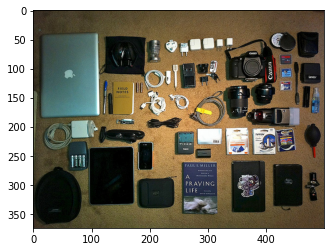

In [90]:
i=901
print("Review:",seq2text(x_val[i]))
print("Original summary:",seq2summary(y_val[i]))
print("Predicted summary:",decode_sequence(x_val[i].reshape(1,maxlen_english),vgg_val[i]))
im=mp.imread(img_path[8001+901])
plt.imshow(im)

Review: head of a cat 
Original summary: നിലത്ത് കറുത്ത പുള്ളി 
Predicted summary:  നിലത്ത് കറുത്ത പുള്ളി


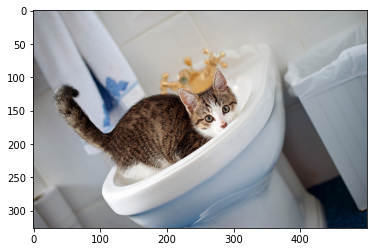

In [91]:
i=991
print("Review:",seq2text(x_val[i]))
print("Original summary:",seq2summary(y_val[i]))
print("Predicted summary:",decode_sequence(x_val[i].reshape(1,maxlen_english),vgg_val[i]))
im=mp.imread(img_path[8001+991])
plt.imshow(im)

Review: roll of toilet paper on metal holder 
Original summary: ലോഹത്തിന്റെ ടോയ്‌ലറ്റ് കടലാസ്സിന്റെ ചുറ്റ് 
Predicted summary:  തറയിൽ ഇരിക്കുന്ന വെള്ളി പാത്രം


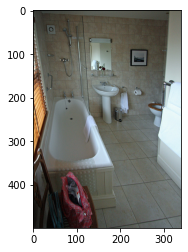

In [92]:
i=975
print("Review:",seq2text(x_val[i]))
print("Original summary:",seq2summary(y_val[i]))
print("Predicted summary:",decode_sequence(x_val[i].reshape(1,maxlen_english),vgg_val[i]))
im=mp.imread(img_path[8001+975])
plt.imshow(im)

In [93]:
!pip install sacrebleu
import sacrebleu
import random

     |████████████████████████████████| 90 kB 4.4 MB/s 


In [95]:
temp_o=[]
temp_p=[]
for i in range(1000):
    s=random.randint(0,len(y_tr)-1)
    temp_o.append(seq2summary(y_tr[s]))
    temp_p.append(decode_sequence(x_tr[s].reshape(1,maxlen_english),vgg_train_[s]))

bleu = sacrebleu.corpus_bleu(temp_o, [temp_p],lowercase=True, tokenize='intl')
#https://github.com/thushv89/attention_keras/blob/master/src/examples/nmt/model.py
#https://towardsdatascience.com/light-on-math-ml-attention-with-keras-dc8dbc1fad39
#https://github.com/thushv89/attention_keras/blob/master/src/examples/nmt_bidirectional/model.py
print(bleu.score)

96.60363145990455


In [ ]:
temp_o=[]
temp_p=[]
for i in range(10000):
    s=random.randint(0,len(y_tr)-1)
    temp_o.append(seq2summary(y_tr[s]))
    temp_p.append(decode_sequence(x_tr[s].reshape(1,maxlen_english),vgg_train_[s]))

bleu = sacrebleu.corpus_bleu(temp_o, [temp_p],lowercase=True, tokenize='intl')
print(bleu.score)

32.396260550602484


Review: child in a stroller 
Original summary: ഒരു ഉന്തുവണ്ടിയിലെ കുട്ടി 
Predicted summary:  ഒരു കറുത്ത ട്രാഷ് ബാഗ്


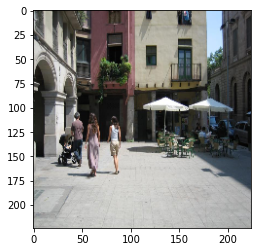

In [ ]:
i=6
print("Review:",seq2text(x_tr[i]))
print("Original summary:",seq2summary(y_tr[i]))
print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,maxlen_english),vgg_train_[i]))
plt.imshow(imagedata[i].astype(np.float32))

In [96]:
temp_o=[]
temp_p=[]
for i in range(1500):
    s=random.randint(0,len(y_val)-1)
    temp_o.append(seq2summary(y_val[s]))
    temp_p.append(decode_sequence(x_val[s].reshape(1,maxlen_english),vgg_val[s]))

Review: man has short hair 
Original summary: മനുഷ്യന് ചെറിയ മുടിയുണ്ട് 
Predicted summary:  മനുഷ്യൻ സ്റ്റ യിൽ നിൽക്കുന്നു


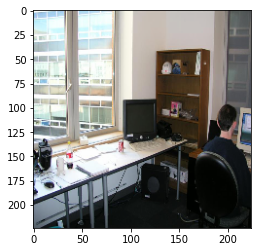

In [ ]:
i=3
print("Review:",seq2text(x_tr[i]))
print("Original summary:",seq2summary(y_tr[i]))
print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,maxlen_english),vgg_train_[i]))
plt.imshow(imagedata[i].astype(np.float32))